# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)



Number of cities in the list: 617
['taolanaro', 'mount gambier', 'uhlove', 'hofn', 'port hardy', 'cape town', 'pisco', 'rikitea', 'burica', 'goure', 'sur', 'cherskiy', 'albany', 'victoria', 'juneau', 'seoul', 'mataura', 'valdivia', 'karpogory', 'ilulissat', 'saint-pierre', 'northam', 'lavrentiya', 'aklavik', 'katsuura', 'ancud', 'innisfail', 'quatre cocos', 'port alfred', 'nabire', 'east london', 'mitsamiouli', 'ous', 'illoqqortoormiut', 'lompoc', 'ponta do sol', 'kavaratti', 'san andres', 'manado', 'ushuaia', 'punta arenas', 'bambous virieux', 'ardahan', 'dehloran', 'georgetown', 'hillsborough', 'boksitogorsk', 'nikolskoye', 'saurimo', 'busselton', 'astaneh-ye ashrafiyeh', 'kannangad', 'belushya guba', 'sitka', 'upernavik', 'butaritari', 'saint-philippe', 'karaul', 'xuddur', 'vaini', 'mahajanga', 'gazojak', 'tarragona', 'arraial do cabo', 'lebu', 'clyde river', 'truth or consequences', 'severo-kurilsk', 'yellowknife', 'port elizabeth', 'ribeira grande', 'lazaro cardenas', 'north bend'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# # Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# # Define an empty list to fetch the weather data for each city
city_data = []

# # Print to logger
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | uhlove
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | pisco
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | burica
City not found. Skipping...
Processing Record 10 of Set 1 | goure
Processing Record 11 of Set 1 | sur
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | victoria
Processing Record 15 of Set 1 | juneau
Processing Record 16 of Set 1 | seoul
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | valdivia
Processing Record 19 of Set 1 | karpogory
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | saint-pierre
Processing Record 22 of Set 1 | northam
Processing Record 23 of Set 1 | lavrentiya
Processing Record 24 o

In [79]:
#there were a few cities that the open weather api wasn't able to find, I didn't 
#try to add them back

In [80]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount gambier,-37.8333,140.7667,286.56,64,100,4.84,AU,1682638779
1,uhlove,44.8215,33.6045,284.27,93,100,5.53,UA,1682638780
2,hofn,64.2539,-15.2082,272.96,55,83,3.43,IS,1682638783
3,port hardy,50.6996,-127.4199,287.25,58,40,1.54,CA,1682638635
4,cape town,-33.9258,18.4232,290.03,88,2,0.89,ZA,1682638147


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [83]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,286.56,64,100,4.84,AU,1682638779
1,uhlove,44.8215,33.6045,284.27,93,100,5.53,UA,1682638780
2,hofn,64.2539,-15.2082,272.96,55,83,3.43,IS,1682638783
3,port hardy,50.6996,-127.4199,287.25,58,40,1.54,CA,1682638635
4,cape town,-33.9258,18.4232,290.03,88,2,0.89,ZA,1682638147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

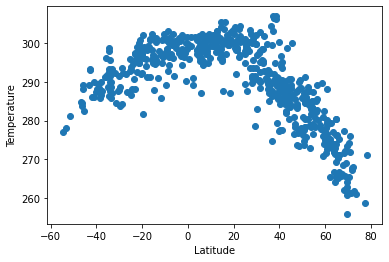

In [84]:
lat = city_data_df['Lat']
lng = city_data_df['Lng']
temp = city_data_df['Max Temp']
hum = city_data_df['Humidity']
clo = city_data_df['Cloudiness']
win = city_data_df['Wind Speed']
country = city_data_df['Country']
thedate = city_data_df['Date']
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties


fig, ax = plt.subplots()
ax.scatter(lat,temp,label="Max Temperature For City")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature")



# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

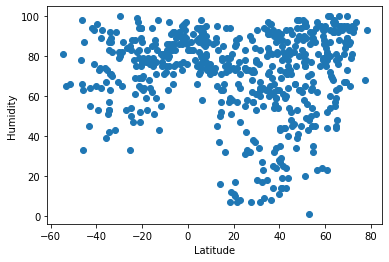

In [85]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
fig, ax1 = plt.subplots()

ax1.scatter(lat,hum)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Humidity')


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

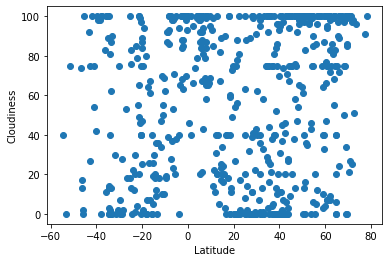

In [86]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
fig, ax2 = plt.subplots()

ax2.scatter(lat,clo)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Cloudiness')


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

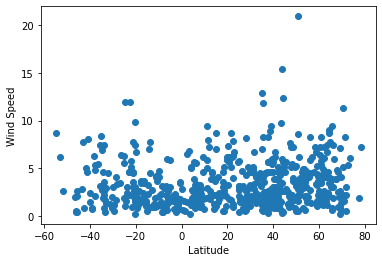

In [87]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
fig, ax3 = plt.subplots()

ax3.scatter(lat,win)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Wind Speed")



# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [88]:
# Define a function to create Linear Regression plots
# b, m = np.polyfit(x ,y , 1)

In [89]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,uhlove,44.8215,33.6045,284.27,93,100,5.53,UA,1682638780
2,hofn,64.2539,-15.2082,272.96,55,83,3.43,IS,1682638783
3,port hardy,50.6996,-127.4199,287.25,58,40,1.54,CA,1682638635
7,goure,13.9835,10.2704,301.38,16,67,1.29,NE,1682638786
8,sur,22.5667,59.5289,300.43,71,2,1.24,OM,1682638787


In [90]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount gambier,-37.8333,140.7667,286.56,64,100,4.84,AU,1682638779
4,cape town,-33.9258,18.4232,290.03,88,2,0.89,ZA,1682638147
5,pisco,-13.7000,-76.2167,295.18,83,0,7.72,PE,1682638784
6,rikitea,-23.1203,-134.9692,297.54,61,30,2.25,PF,1682638785
14,mataura,-46.1927,168.8643,284.53,66,17,0.54,NZ,1682638790


###  Temperature vs. Latitude Linear Regression Plot

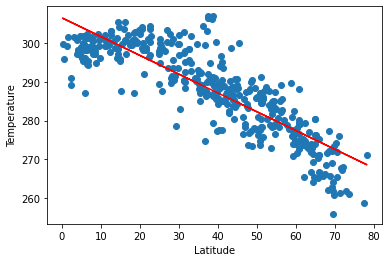

In [91]:
nlat = northern_hemi_df['Lat']
nlng = northern_hemi_df['Lng']
ntemp = northern_hemi_df['Max Temp']
nhum = northern_hemi_df['Humidity']
nclo = northern_hemi_df['Cloudiness']
nwin = northern_hemi_df['Wind Speed']
ncountry = northern_hemi_df['Country']
nthedate = northern_hemi_df['Date']
# Linear regression on Northern Hemisphere
fig, ax4 = plt.subplots()
ax4.scatter(nlat,ntemp)
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Temperature')
m, b = np.polyfit(nlat,ntemp,1)
plt.plot(nlat,m*nlat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig5.png")
plt.show()


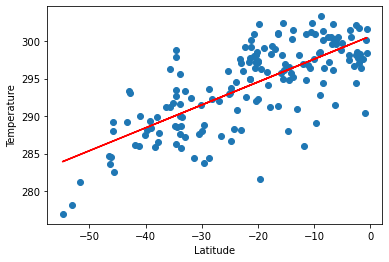

In [92]:
slat = southern_hemi_df['Lat']
slng = southern_hemi_df['Lng']
stemp = southern_hemi_df['Max Temp']
shum = southern_hemi_df['Humidity']
sclo = southern_hemi_df['Cloudiness']
swin = southern_hemi_df['Wind Speed']
scountry = southern_hemi_df['Country']
sthedate = southern_hemi_df['Date']
# Linear regression on Southern Hemisphere
fig, ax5 = plt.subplots()
ax5.scatter(slat,stemp)
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Temperature')
m, b = np.polyfit(slat,stemp,1)
plt.plot(slat,m*slat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** When a city is closer to the equator there is a noticable increase in the maximum temperature that the city experinces for bother hemispheres. Another thing i noticed is that in the nothern hemisphere the cities the max temperature measurment plateaus from the equator to about the 20th latitude. This could be related to the tilt of the earth during a years rotation. Another theory is the sahara is skewing the measurment due to being above the equator and extremly hot.

### Humidity vs. Latitude Linear Regression Plot

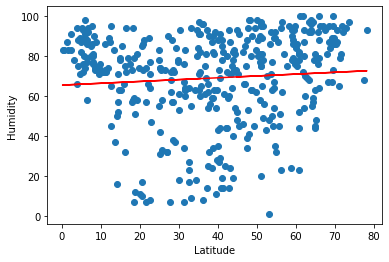

In [93]:
# Northern Hemisphere
fig, ax6 = plt.subplots()
ax6.scatter(nlat,nhum)
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Humidity')
m, b = np.polyfit(nlat,nhum,1)
plt.plot(nlat,m*nlat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig7.png")
plt.show()

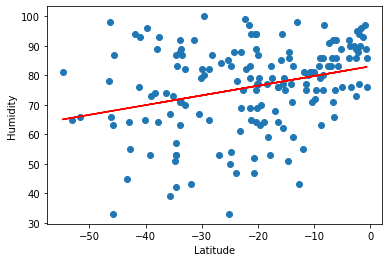

In [94]:
# Southern Hemisphere
fig, ax7 = plt.subplots()
ax7.scatter(slat,shum)
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Humidity')
m, b = np.polyfit(slat,shum,1)
plt.plot(slat,m*slat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** There isn't any strong correlation between latitude and humidity in the northern hemisphere. In the southern hemisphere however the closer to the equator the higher the humidity is. Maybe the different seasons in the southern hemisphere lead to this result?

### Cloudiness vs. Latitude Linear Regression Plot

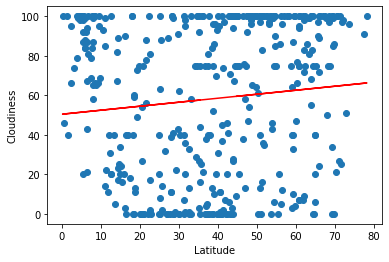

In [95]:
# Northern Hemisphere
fig, ax8 = plt.subplots()
ax8.scatter(nlat,nclo)
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Cloudiness')
m, b = np.polyfit(nlat,nclo,1)
plt.plot(nlat,m*nlat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig9.png")
plt.show()

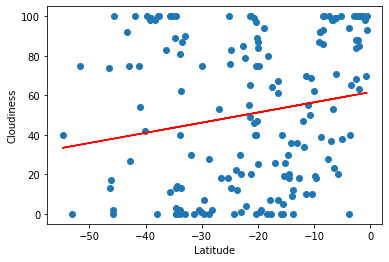

In [96]:
# Southern Hemisphere
fig, ax11 = plt.subplots()
ax11.scatter(slat,sclo)
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Cloudiness')
m, b = np.polyfit(slat,sclo,1)
plt.plot(slat,m*slat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** Cloudiness by Latitude yeilded a similar relationship between the northern and southern hemisphere as humidity did. There is no strong correlation in the north and the southern hemisphere shows that as you get closer to the equator the cities get cloudier.

### Wind Speed vs. Latitude Linear Regression Plot

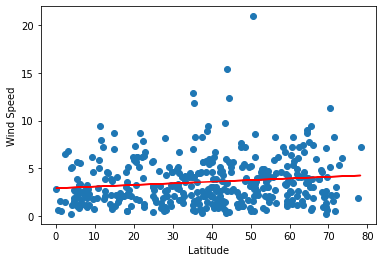

In [97]:
# Northern Hemisphere
fig, ax10 = plt.subplots()
ax10.scatter(nlat,nwin)
ax10.set_xlabel('Latitude')
ax10.set_ylabel('Wind Speed')
m, b = np.polyfit(nlat,nwin,1)
plt.plot(nlat,m*nlat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig11.png")
plt.show()

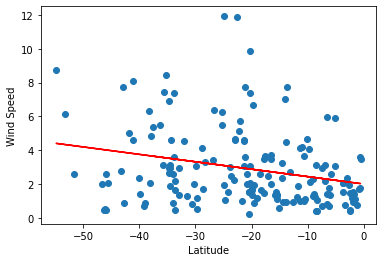

In [98]:
# Southern Hemisphere
fig, ax11 = plt.subplots()
ax11.scatter(slat,swin)
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Wind Speed')
m, b = np.polyfit(slat,swin,1)
plt.plot(slat,m*slat+b, color = 'red')
plt.ticklabel_format(style = 'plain')
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** In both of the linear regressions there is no strong relationship between latitude and the wind speed the cities are experincing. Cities in the northern hemisphere get slightly more windy as you go north and the reverse is true for the south. The Artic and Antartic may be affecting the wind speeds to get those results.